In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

### Khởi tạo dữ liệu

In [50]:
# Tạo các cột theo các phân phối khác nhau
df = pd.DataFrame({"beta": np.random.beta(5, 1, 1000) * 60,
                   "exponential": np.random.exponential(10, 1000),
                   "normal_p": np.random.normal(10, 2, 1000),
                   "normal_l": np.random.normal(10, 10, 1000),
})

df

,beta,exponential,normal_p,normal_l
0,37.154174,24.730830,9.919661,9.540189
1,44.267320,6.502216,8.721135,-2.923945
2,34.474573,7.319474,8.768342,10.844543
3,59.987774,20.301966,12.854787,4.906351
4,48.161813,6.209505,10.172813,-2.088236
...,...,...,...,...
995,51.382120,9.632363,8.134823,7.229447
996,51.720557,4.206660,6.705503,-7.787156
997,32.743157,14.256837,12.526771,6.987047
998,57.949702,8.741886,9.429469,21.644645


In [51]:
# Thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500)
second_half = np.random.normal(-20, 3, 500)
bimodal = np.concatenate([first_half, second_half])

df["bimodal"] = bimodal

df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,37.154174,24.730830,9.919661,9.540189,16.549456
1,44.267320,6.502216,8.721135,-2.923945,17.299573
2,34.474573,7.319474,8.768342,10.844543,21.588488
3,59.987774,20.301966,12.854787,4.906351,22.862021
4,48.161813,6.209505,10.172813,-2.088236,18.249573


### Trực quan hóa dữ liệu sinh ra

<AxesSubplot:ylabel='Density'>

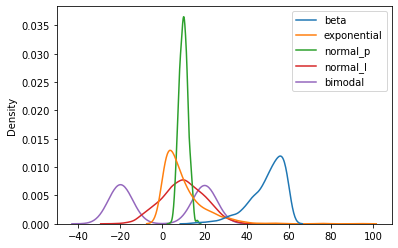

In [52]:
sns.kdeplot(data = df)

In [53]:
# Thống kê về dữ liệu sinh ra
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.753003,9.869782,9.992911,9.802955,0.109944
std,8.481107,9.894399,2.072976,10.060320,20.154216
min,14.849421,0.003950,3.943129,-21.698393,-27.730231
25%,45.147673,3.074764,8.513572,3.174227,-19.941327
50%,51.905787,6.875119,10.002611,9.928553,0.261565
75%,56.293145,13.380329,11.409352,16.920587,20.087487
max,59.987774,94.033759,16.661801,36.558529,29.951392


### Thêm một đặc trưng với giá trị lớn hơn nhiều

<AxesSubplot:ylabel='Density'>

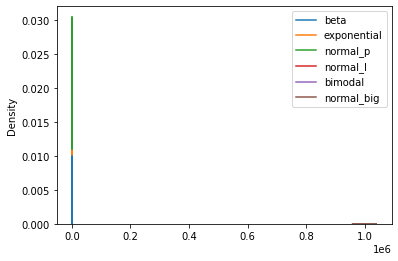

In [54]:
normal_big = np.random.normal(1000000, 10000, (1000, 1))

df["normal_big"] = normal_big
sns.kdeplot(data = df)

<AxesSubplot:>

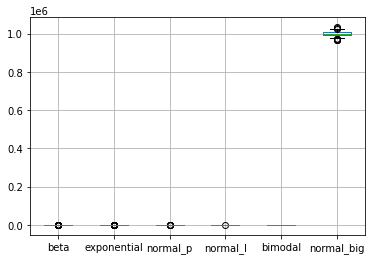

In [55]:
# Trực quan hóa bằng biểu đồ box plot
df.boxplot()

### Chuẩn hóa với Min - Max Scaling

In [56]:
# Khai báo đối tượng MinMaxScaler
scaler = MinMaxScaler()

In [57]:
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = scaler.fit_transform(df)

# Lấy danh sách cột
col_names = list(df.columns)

# Truyền về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns = col_names)

df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,0.494142,0.262969,0.469902,0.536221,0.767657,0.401456
1,0.651727,0.069109,0.375669,0.322270,0.780661,0.604480
2,0.434778,0.077800,0.379380,0.558611,0.855016,0.650481
3,1.000000,0.215868,0.700675,0.456680,0.877095,0.463443
4,0.738006,0.065996,0.489806,0.336615,0.797131,0.497449


### Biểu diễn dữ liệu đã được chuẩn hóa

<AxesSubplot:ylabel='Density'>

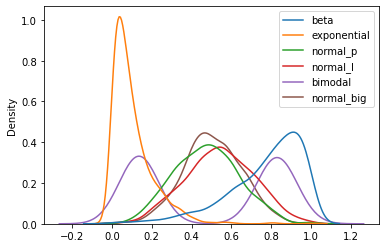

In [58]:
sns.kdeplot(data = df_s)

<AxesSubplot:>

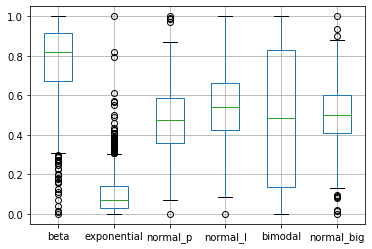

In [59]:
# Trực quan hóa dữ liệu bằng biểu đồ box plot
df_s.boxplot()

In [60]:
# Thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.773258,0.104922,0.475661,0.540731,0.482652,0.505506
std,0.187891,0.105226,0.162987,0.172689,0.349404,0.147418
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.671231,0.032658,0.359349,0.426947,0.135033,0.409391
50%,0.820951,0.073074,0.476424,0.542887,0.485281,0.499870
75%,0.918149,0.142257,0.587028,0.662908,0.828994,0.600684
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
# Lấy giá trị min của cột "beta"
df_s["beta"].min()

0.0

In [62]:
# Lấy giá trị max của cột "beta"
df_s["beta"].max()

0.9999999999999999

In [63]:
# In các giá trị min của từng cột trong dữ liệu chưa chuẩn hóa
mins = [df[col].min() for col in df.columns]
mins

[14.849420873239463,
 0.003950440893878594,
 3.943129464762709,
 -21.698393061370655,
 -27.73023127209386,
 966052.0612953636]

In [64]:
# In các giá trị min của từng cột trong dữ liệu đã chuẩn hóa
mins = [df_s[col].min() for col in df_s.columns]
mins

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [65]:
# In các giá trị max của từng cột dữ liệu chưa chuẩn hóa
maxs = [df[col].max() for col in df.columns]
maxs

[59.98777400183727,
 94.03375866361601,
 16.661800661208574,
 36.5585290266035,
 29.951392257749934,
 1032407.2348188962]

In [66]:
# In các giá trị max của từng cột dữ liệu đã chuẩn hóa
maxs = [df_s[col].max() for col in df_s.columns]
maxs

[0.9999999999999999, 1.0, 1.0000000000000002, 0.9999999999999998, 1.0, 1.0]